<a href="https://colab.research.google.com/github/GiovaniMN/Deteccao-de-EPI-com-visao-computacional/blob/main/examples/finding-removing-duplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/visual_layer_logo.png" width=400>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://discord.com/invite/tkYHJCA7mb/" target="_blank" style="text-decoration: none;"> Join Discord Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center>
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a>
</center>


<br>

<center>
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/tkYHJCA7mb/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
</center>

# Finding and Removing Duplicates

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=google-colab&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/finding-removing-duplicates.ipynb)
[![Open in Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=kaggle&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/finding-removing-duplicates.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/finding-removing-duplicates)

This notebook shows how to analyze an image dataset for duplicates and near-duplicates [fastdup](https://github.com/visual-layer/fastdup).

## Installation
First, let's start with the installation:

> ✅ **Tip** - If you're new to fastdup, we encourage you to run the notebook in [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) or [Kaggle](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb) for the best experience. If you'd like to just view and skim through the notebook, we recommend viewing using [nbviewer](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb).  



In [1]:
!pip install fastdup -Uq

Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [2]:
import fastdup
fastdup.__version__

'2.29'

## Download Dataset

For demonstration, we will use a generally curated [Oxford IIIT Pet dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Feel free to swap this dataset with your own.

The dataset consists of images and annotations for 37 category pets with roughly 200 images for each class.

> 🗒 **Note** - fastdup works on both unlabeled and labeled images. But for now, we are only interested in finding issues in the images and not the annotations.
> If you're interested in finding annotation issues, head to:
> + 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)
> + 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb).


Let's download only from the dataset and extract them into the local directory:

In [4]:
!curl -L "https://app.roboflow.com/ds/3dqD3kdjUh?key=D6MKcU6aGS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: train/images/1d151bacbf_jpg.rf.5b8378da484ceb1ad1f129b432f8763e.jpg  
 extracting: train/images/1d1579511f_jpg.rf.d21856d18ff2614eaca5c35461100540.jpg  
 extracting: train/images/1d5a7c5b57_jpg.rf.722108f50ef699d18c8bc4eae6149cdc.jpg  
 extracting: train/images/1d6758f1bad64e089c3864b7e7a304ed_jpeg_jpg.rf.89ee4d2eaf387aa6a0136026171eeafa.jpg  
 extracting: train/images/1da390837a_jpg.rf.e09bcca39a01b63de743a1625fa7b43a.jpg  
 extracting: train/images/1dcefdbbea_jpg.rf.18aeb943ccee534f2d7396d5006e18ba.jpg  
 extracting: train/images/1e00162d46_jpg.rf.37a909e010f51191458819eef6c372bb.jpg  
 extracting: train/images/1e1f65e039_jpg.rf.d5944faf7cc5836f98a8144d4eb1e001.jpg  
 extracting: train/images/1e3d384881_jpg.rf.81870dd0ffe8ff36780be1e4fe39cc7e.jpg  
 extracting: train/images/1e4386e998_jpg.rf.80c79b023cf74bac26b3666a79286a33.jpg  
 extracting: train/images/1ed6c9378c_jpg.rf.81686238e57758b217b469d90db272b9.jpg  
 

## Run fastdup

Once the extraction completes, we can run fastdup on the images.

For that let's initialize fastdup and specify the input directory which points to the folder of images.

In [5]:
fd = fastdup.create(input_dir="/content/train")


fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/train"
Work directory is set to "work_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



> 🗒 **Note** - The `.create` method also has an optional `work_dir` parameter which specifies the directory to store artifacts from the run.

In other words you can run `fastdup.create(input_dir="images/", work_dir="my_work_dir/")` if you'd like to store the artifacts in a `my_work_dir`.

Now, let's run fastdup.

In [6]:
fd.run()

fastdup By Visual Layer, Inc. 2024. All rights reserved.
Creating visualization:  67%|██████▋   | 2/3 [01:52<01:05, 65.47s/it]/usr/local/lib/python3.11/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [01:56<00:00, 38.67s/it]


Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



0

## View Run Summary

After the run is completed, you can optionally view the summary with:

In [7]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 2822 images
    Valid images are 100.00% (2,822) of the data, invalid are 0.00% (0) of the data
    Outliers: 6.48% (183) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 2822 images',
 'Valid images are 100.00% (2,822) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 6.48% (183) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Removing Duplicates

Let's first get the information about which cluster each image belongs to.

In [8]:
connected_components_df , _ = fd.connected_components()
connected_components_df

index  component_id  count  mean_distance  min_distance  max_distance                                                                                                                  filename error_code  is_valid  fd_index
0       52            52      4       0.999918      0.999918      0.999918                                                           train/images/005298_jpg.rf.ed399e25eb8f78e19465ea66b9bd2f83.jpg      VALID      True        52
1       53            52      4       0.999918      0.999918      0.999918                                                           train/images/005298_jpg.rf.f30898332405ed91fa50dbd6aee4d594.jpg      VALID      True        53
2       59            58      4       0.999921      0.999921      0.999921                                                           train/images/005314_jpg.rf.5e9db5dc6f3a68ace39434aefe13ef89.jpg      VALID      True        59
3       60            58      4       0.999921      0.999921      0.999921                                                           train/images/005314_jpg.rf.91bd6ee0f2bb1e3a2730c28262a40148.jpg      VALID      True        60
4       62            60      4       0.999968      0.999968      0.999968                                                           train/images/005317_jpg.rf.6d1b5e9fdb7287c3d4944afb3c500ebb.jpg      VALID      True        62
..     ...           ...    ...            ...           ...           ...                                                                                                                       ...        ...       ...       ...
264   2774          2634      4       0.977790      0.977790      0.977790  train/images/worker-using-fiber-machine-cutting-steel-roof-structure-spar-1-_jpg.rf.b7406983bb7f14ff7986dc27d3bd491c.jpg      VALID      True      2774
265   2777          2637      4       0.987719      0.987719      0.987719     train/images/worker-using-fiber-machine-cutting-steel-wearing-safety-prot_jpg.rf.674dac4dcf3945a3e0b1a98145aaf634.jpg      VALID      True      2777
266   2778          2637      4       0.987719      0.987719      0.987719     train/images/worker-using-fiber-machine-cutting-steel-wearing-safety-prot_jpg.rf.e57792128627a92847440bbc38726dcd.jpg      VALID      True      2778
267   2784          2643      4       0.978549      0.978549      0.978549  train/images/young-construction-worker-clearing-away-barriers-barricade-c-1-_jpg.rf.14e68a75a7d96af4e9a1d59b8aef6657.jpg      VALID      True      2784
268   2785          2643      4       0.978549      0.978549      0.978549  train/images/young-construction-worker-clearing-away-barriers-barricade-c-1-_jpg.rf.e766860433a15bb5b0e682983391b269.jpg      VALID      True      2785

[269 rows x 10 columns]

Duplicates are stored in a cluster (`component_id`). Let's group the images based on the `component_id`.

In [9]:
duplicates_df = (
    connected_components_df
    .groupby('component_id')
    .agg(
        filenames=('filename', list),
        count=('filename', 'size'),
        mean_distance=('mean_distance', 'mean')
    )
    .sort_values('mean_distance', ascending=False)
)

In [10]:
duplicates_df

filenames  count  mean_distance
component_id                                                                                                                                                                                
830                         [train/images/3435b54406_jpg.rf.4af7f9990e11e49e5c70ce6dc3c0a0cd.jpg, train/images/3435b54406_jpg.rf.d7d7c0bd5299b57be07737967b372ed9.jpg]      2       1.000000
1694                        [train/images/f66d092b59_jpg.rf.7701d02dfbecc839d3cc28dd6bc15e3d.jpg, train/images/f66d092b59_jpg.rf.ef9ca9f75631e8651931ee17495599f1.jpg]      2       1.000000
330                         [train/images/11c6954563_jpg.rf.4c383b5ed46174193573857d86c54ab1.jpg, train/images/11c6954563_jpg.rf.b8065fa06a649ecbc05045502b963237.jpg]      2       1.000000
1824                      [train/images/image-2-_jpeg_jpg.rf.0b79c9409bf41cee387a4b11f0291e2a.jpg, train/images/image-2-_jpeg.rf.d194032fc63039566879bcfd115317ed.jpg]      2       1.000000
1520                        [train/images/c14c4a7987_jpg.rf.7f32bcebbc57b49ddb0f63fdb7d95396.jpg, train/images/c14c4a7987_jpg.rf.d1403c9b80afb812fcd21cf518bc4b42.jpg]      2       1.000000
...                                                                                                                                                                ...    ...            ...
1302                      [train/images/7472340-830_jpg.rf.33269d75b5c9f3e623eeafe1d05cdf09.jpg, train/images/7472345-714_jpg.rf.a49a63cbf02e0a7ba47305dd62ecb856.jpg]      2       0.962048
777                                       [train/images/312_jpg.rf.e7552035534c9c5c4472350070d4e59b.jpg, train/images/313_jpg.rf.c6d73b5646ccf08cafdff97cd89dc7f9.jpg]      2       0.961789
2068          [train/images/lt5_dark_1_mp4-70_jpg.rf.861fa35c4469d934459bdefb52041c6b.jpg, train/images/lt5_dark_1_mp4-72_jpg.rf.594d7bf6657b686f4df11a26be51adc5.jpg]      2       0.960345
2294                            [train/images/ppe_0364_jpg.rf.3b9f186bebd7e9ff4dfdbd2d134303a2.jpg, train/images/ppe_0364_jpg.rf.83a91fdf9b1ab15ba718bbf72fa6ce6e.jpg]      2       0.960190
1068                        [train/images/4bb7f0d8c8_jpg.rf.76753b515c5041a994f7f1227ef4c626.jpg, train/images/c4e1baf816_jpg.rf.cb4c496bcafdc3c77d5159d75cde8c75.jpg]      2       0.960168

[127 rows x 3 columns]

Above, we see that there are 73 clusters. Each cluster represents a set of images that are duplicates or near-duplicates of each other.

Now, let's simplify the above dataframe by keeping only the first image from each cluster and treat the rest as duplicates.

In [11]:
import pandas as pd

def extract_image_duplicates(row):
    filenames = row['filenames']
    image = filenames[0]
    duplicates = filenames[1:] if len(filenames) > 1 else []
    return pd.Series({'image': image, 'duplicates': duplicates})

df = duplicates_df.apply(extract_image_duplicates, axis=1)
df

image                                                                    duplicates
component_id                                                                                                                                                          
830                  train/images/3435b54406_jpg.rf.4af7f9990e11e49e5c70ce6dc3c0a0cd.jpg         [train/images/3435b54406_jpg.rf.d7d7c0bd5299b57be07737967b372ed9.jpg]
1694                 train/images/f66d092b59_jpg.rf.7701d02dfbecc839d3cc28dd6bc15e3d.jpg         [train/images/f66d092b59_jpg.rf.ef9ca9f75631e8651931ee17495599f1.jpg]
330                  train/images/11c6954563_jpg.rf.4c383b5ed46174193573857d86c54ab1.jpg         [train/images/11c6954563_jpg.rf.b8065fa06a649ecbc05045502b963237.jpg]
1824              train/images/image-2-_jpeg_jpg.rf.0b79c9409bf41cee387a4b11f0291e2a.jpg          [train/images/image-2-_jpeg.rf.d194032fc63039566879bcfd115317ed.jpg]
1520                 train/images/c14c4a7987_jpg.rf.7f32bcebbc57b49ddb0f63fdb7d95396.jpg         [train/images/c14c4a7987_jpg.rf.d1403c9b80afb812fcd21cf518bc4b42.jpg]
...                                                                                  ...                                                                           ...
1302                train/images/7472340-830_jpg.rf.33269d75b5c9f3e623eeafe1d05cdf09.jpg        [train/images/7472345-714_jpg.rf.a49a63cbf02e0a7ba47305dd62ecb856.jpg]
777                         train/images/312_jpg.rf.e7552035534c9c5c4472350070d4e59b.jpg                [train/images/313_jpg.rf.c6d73b5646ccf08cafdff97cd89dc7f9.jpg]
2068          train/images/lt5_dark_1_mp4-70_jpg.rf.861fa35c4469d934459bdefb52041c6b.jpg  [train/images/lt5_dark_1_mp4-72_jpg.rf.594d7bf6657b686f4df11a26be51adc5.jpg]
2294                   train/images/ppe_0364_jpg.rf.3b9f186bebd7e9ff4dfdbd2d134303a2.jpg           [train/images/ppe_0364_jpg.rf.83a91fdf9b1ab15ba718bbf72fa6ce6e.jpg]
1068                 train/images/4bb7f0d8c8_jpg.rf.76753b515c5041a994f7f1227ef4c626.jpg         [train/images/c4e1baf816_jpg.rf.cb4c496bcafdc3c77d5159d75cde8c75.jpg]

[127 rows x 2 columns]

## Visualizing Duplicates

The following steps are optional and are used to visualize the duplicates in the dataset to get a better understanding of the duplicates.


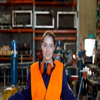
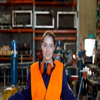
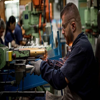
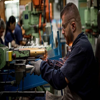
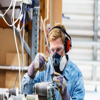
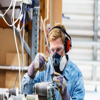
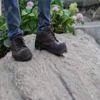
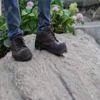
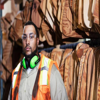
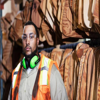
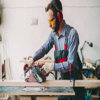
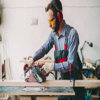
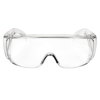
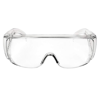
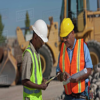
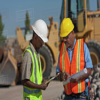
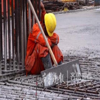
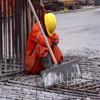
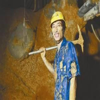
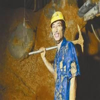
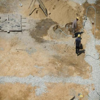
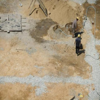
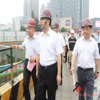
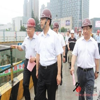
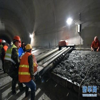
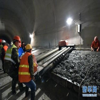
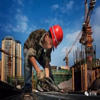
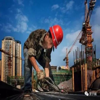
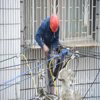
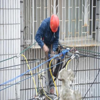
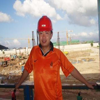
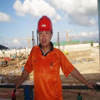
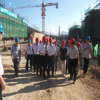
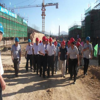
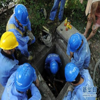
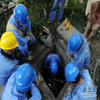
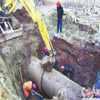
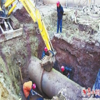
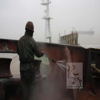
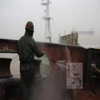
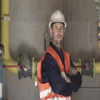
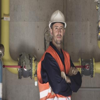
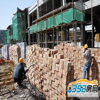
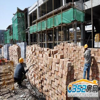
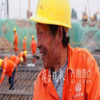
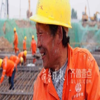
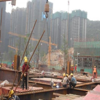
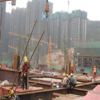
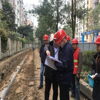
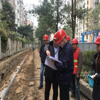
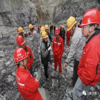
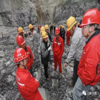
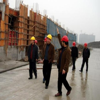
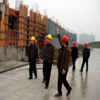
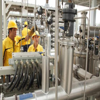
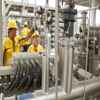
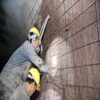
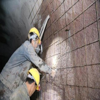
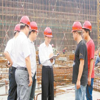
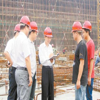
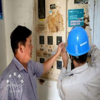
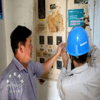
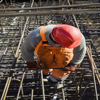
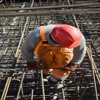
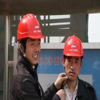
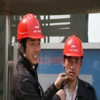
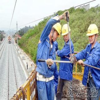
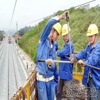
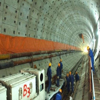
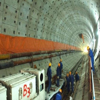
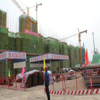
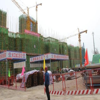
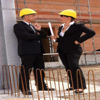
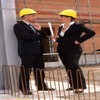
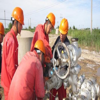
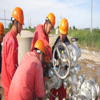
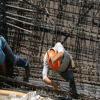
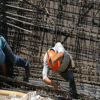
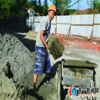
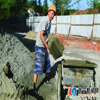
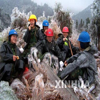
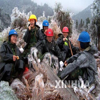
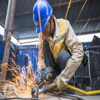
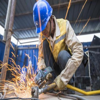
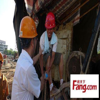
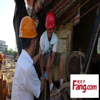
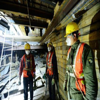
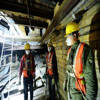
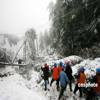
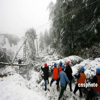
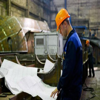
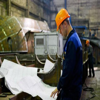
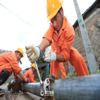
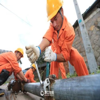
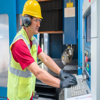
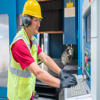
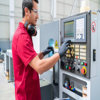
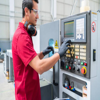
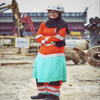
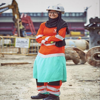
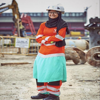
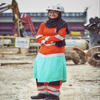
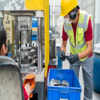
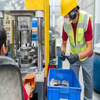
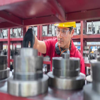
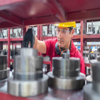
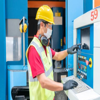
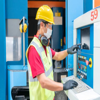
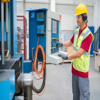
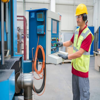
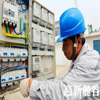
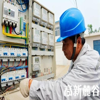
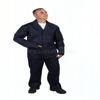
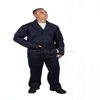
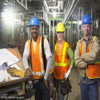
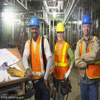
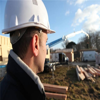
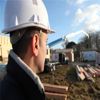
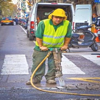
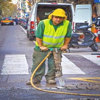
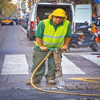
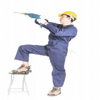
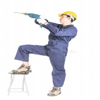
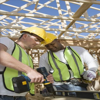
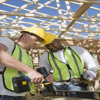
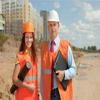
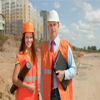
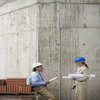
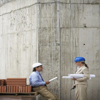
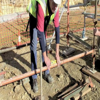
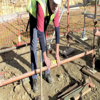
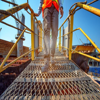
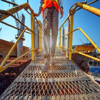
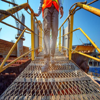
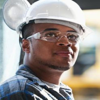
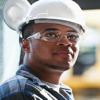
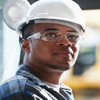
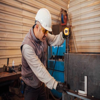
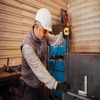
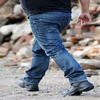
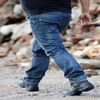
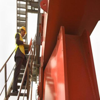
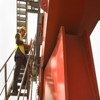
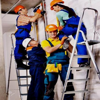
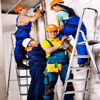
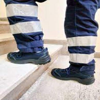
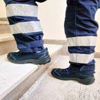
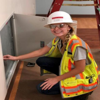
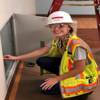
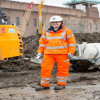
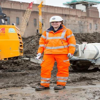
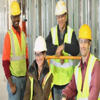
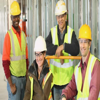
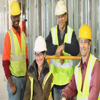
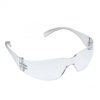
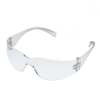
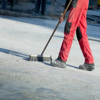
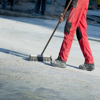
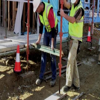
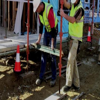
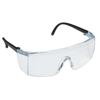
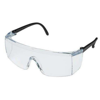
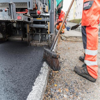
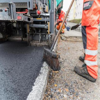
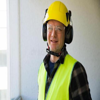
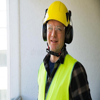
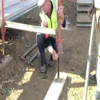
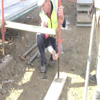
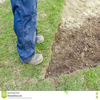
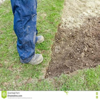
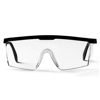
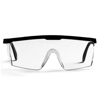
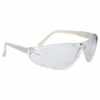
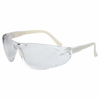
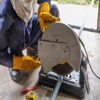
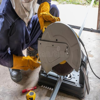
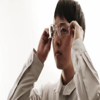
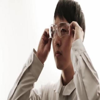
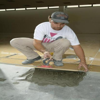
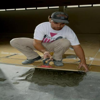
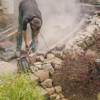
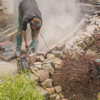
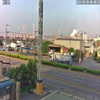
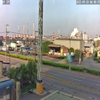
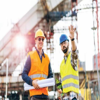
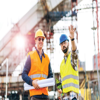
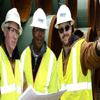
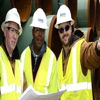
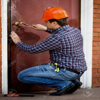
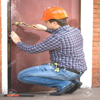
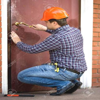
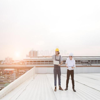
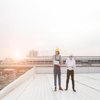
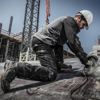
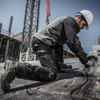
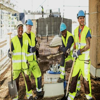
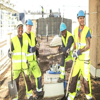
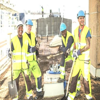
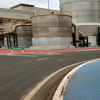
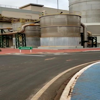
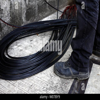
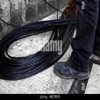
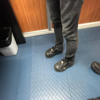
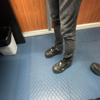
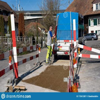
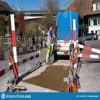
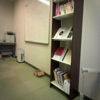
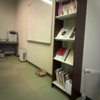
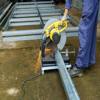
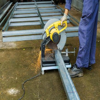
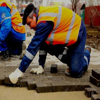
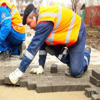
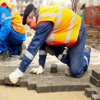
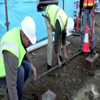
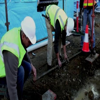
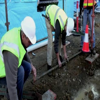
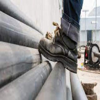
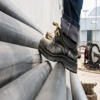
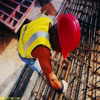
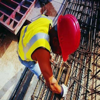
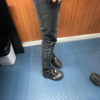
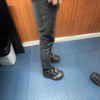
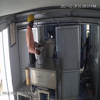
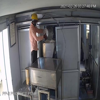
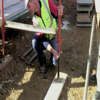
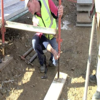
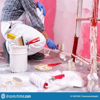
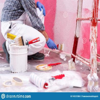
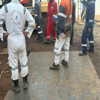
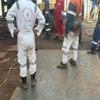
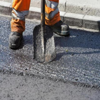
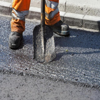
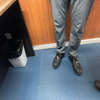
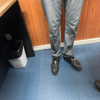
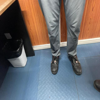
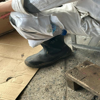
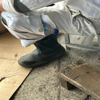
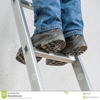
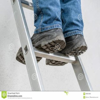
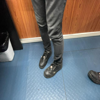
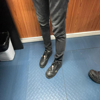
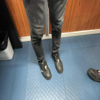
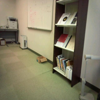
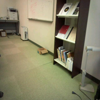
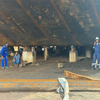
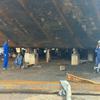
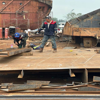
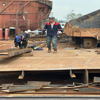
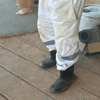
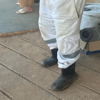
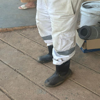
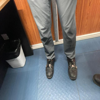
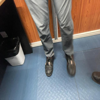
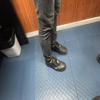
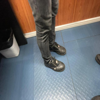
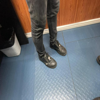
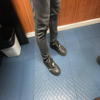
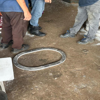
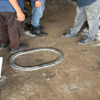
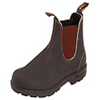
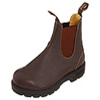
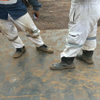
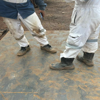
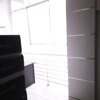
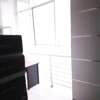
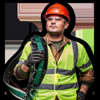
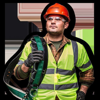
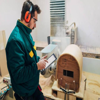
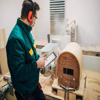

In [12]:
import base64
from io import BytesIO
from PIL import Image

def resize_and_encode_image(image_path, width=100):
    with Image.open(image_path) as img:
        wpercent = (width / float(img.size[0]))
        height = int((float(img.size[1]) * float(wpercent)))
        resized_img = img.resize((width, height))
        buffered = BytesIO()
        resized_img.save(buffered, format="PNG")
        encoded_string = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded_string}" width="{width}">'

def display_image_list(image_list, width=100):
    if isinstance(image_list, list):
        return ''.join([resize_and_encode_image(image, width) for image in image_list])
    else:
        return ''

# Apply the resize_and_encode_image function to the 'image' column
df['image_preview'] = df['image'].apply(lambda x: resize_and_encode_image(x, width=100))

# Apply the display_image_list function to the 'duplicates' column
df['duplicates_preview'] = df['duplicates'].apply(lambda x: display_image_list(x, width=100))

display(df.style)

## Get Duplicates List

In [13]:
duplicates_to_remove = df['duplicates'].tolist()

In [14]:
duplicates_to_remove

[['train/images/3435b54406_jpg.rf.d7d7c0bd5299b57be07737967b372ed9.jpg'],
 ['train/images/f66d092b59_jpg.rf.ef9ca9f75631e8651931ee17495599f1.jpg'],
 ['train/images/11c6954563_jpg.rf.b8065fa06a649ecbc05045502b963237.jpg'],
 ['train/images/image-2-_jpeg.rf.d194032fc63039566879bcfd115317ed.jpg'],
 ['train/images/c14c4a7987_jpg.rf.d1403c9b80afb812fcd21cf518bc4b42.jpg'],
 ['train/images/c25f72cb86_jpg.rf.9b711d47e28d70a95406cf5dcdc4b634.jpg'],
 ['train/images/safety_goggles_40_jpeg_jpg.rf.cdad5f1e8c6380408d5ad26cbfe7e06c.jpg'],
 ['train/images/ppe_0927_jpg.rf.9405077869c55dd307c15e3eef65f824.jpg'],
 ['train/images/005473_jpg.rf.c53dc2f38cdda3c85e99661148560d36.jpg'],
 ['train/images/005461_jpg.rf.875d973785a6223c2526d134b40408c9.jpg'],
 ['train/images/005464_jpg.rf.d8fa0200ea43d6860cd1d1cf70b5997a.jpg'],
 ['train/images/005432_jpg.rf.c0412741dda404cf4155df08ac8fb899.jpg'],
 ['train/images/005452_jpg.rf.87c132dc7048132c2dbf26ac5576c69f.jpg'],
 ['train/images/005353_jpg.rf.d9380e8a7fa56046ba1

## Interactive Exploration
In addition to the static visualizations presented above, fastdup also offers interactive exploration of the dataset.

To explore the dataset and issues interactively in a browser, run:

In [15]:
fd.explore()


The Visual Layer application was launched on your machine, you can find it on http://localhost:9990/dataset/fc6ffbd1-e1e4-406b-85d5-ef2a75ee052b/data?page=1 in your web browser.
Use Ctrl + C to stop the application server.

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Thank you for using Visual Layer, the application server on your machine is now closed.
Bye!


> 🗒 **Note** - This currently requires you to sign-up (for free) to view the interactive exploration. Alternatively, you can visualize fastdup in a non-interactive way using fastdup's built in galleries shown in the upcoming cells.

You'll be presented with a web interface that lets you conveniently view, filter, and curate your dataset in a web interface.


![image.png](https://vl-blog.s3.us-east-2.amazonaws.com/fastdup_assets/cloud_preview.gif)

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a dataset or any folder of images.

We've seen how to use fastdup to find:

+ Broken images.
+ Duplicate/near-duplicates.
+ Outliers.
+ Dark, bright and blurry images.
+ Image clusters.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).


<center>
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
<br>
<div style="text-align:center; font-family:'DM Sans',sans-serif; font-style:italic; font-size:12px; max-width:600px; margin: 20px auto auto;">
    <img style="width:200px" alt="logo" src="https://d2iycffepdu1yp.cloudfront.net/design-assets/VL_horizontal_logo.png" width=300>
    <div style="margin-top:20px;">Copyright © 2024 Visual Layer. All rights reserved.</div>
</div>

</center>